# Income Prediction

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_score

**Uploading the dataset**

# Task 1

In [2]:
incom_df = pd.read_csv('DS2_C5_S3_Income_Data_Challenge.csv')

In [3]:
incom_df

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
incom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_Per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
incom_df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# the above data shows a statistics description of the numerical features

In [7]:
incom_df['Income_Bracket'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income_Bracket, dtype: int64

# Task 2

In [8]:
incom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_Per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
incom_df.duplicated().sum()

24

In [10]:
# 24 duplicates in the income data, lets drop them

In [11]:
incomdf=incom_df.drop_duplicates()

In [12]:
incomdf.duplicated().sum()

0

In [13]:
# no duplicate values

In [14]:
incomdf.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [15]:
# no null values

In [16]:
# let's check for outliers in the numerical values

In [17]:
def num_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(10,10))
    ax[0].hist(incomdf[col])
    sns.boxplot(y=incomdf[col],ax=ax[1])

In [18]:
incomdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32537 non-null  int64 
 1   WorkClass       32537 non-null  object
 2   Fnlwgt          32537 non-null  int64 
 3   Education       32537 non-null  object
 4   Education_Num   32537 non-null  int64 
 5   Marital_Status  32537 non-null  object
 6   Occupation      32537 non-null  object
 7   Relationship    32537 non-null  object
 8   Race            32537 non-null  object
 9   Gender          32537 non-null  object
 10  Capital_Gain    32537 non-null  int64 
 11  Capital_Loss    32537 non-null  int64 
 12  Hours_Per_Week  32537 non-null  int64 
 13  Native_Country  32537 non-null  object
 14  Income_Bracket  32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


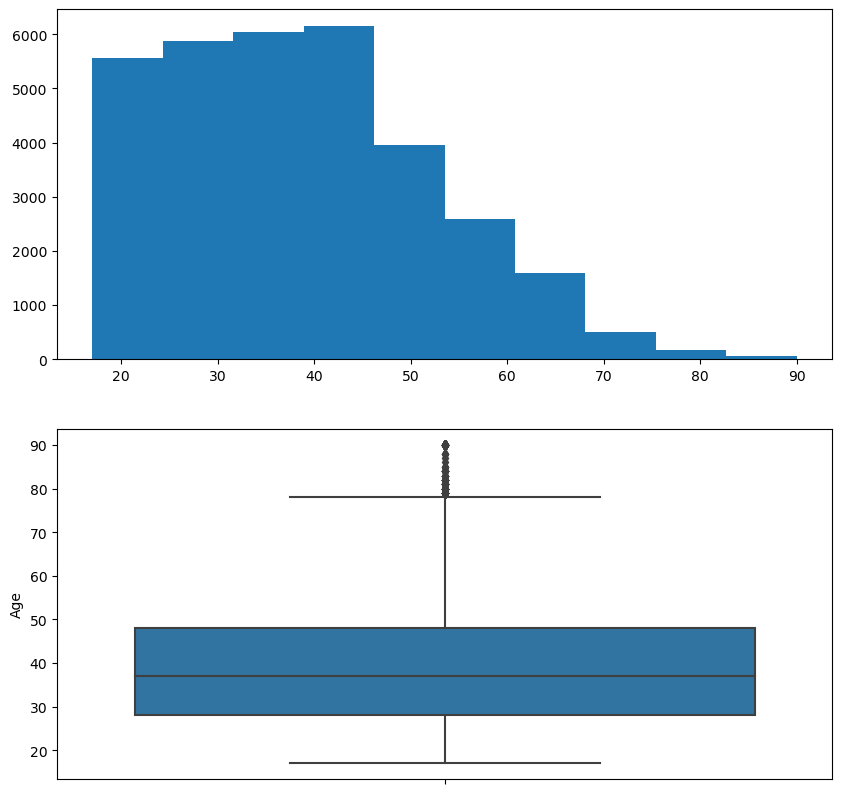

In [19]:
num_visual('Age')

In [20]:
iqr=incomdf['Age'].quantile(0.75)-incomdf['Age'].quantile(0.25)
lf=incomdf['Age'].quantile(0.25)-1.5*iqr
uf=incomdf['Age'].quantile(0.75)+1.5*iqr
incomdf=incomdf[(incomdf['Age']>lf) & (incomdf['Age']<uf)]  

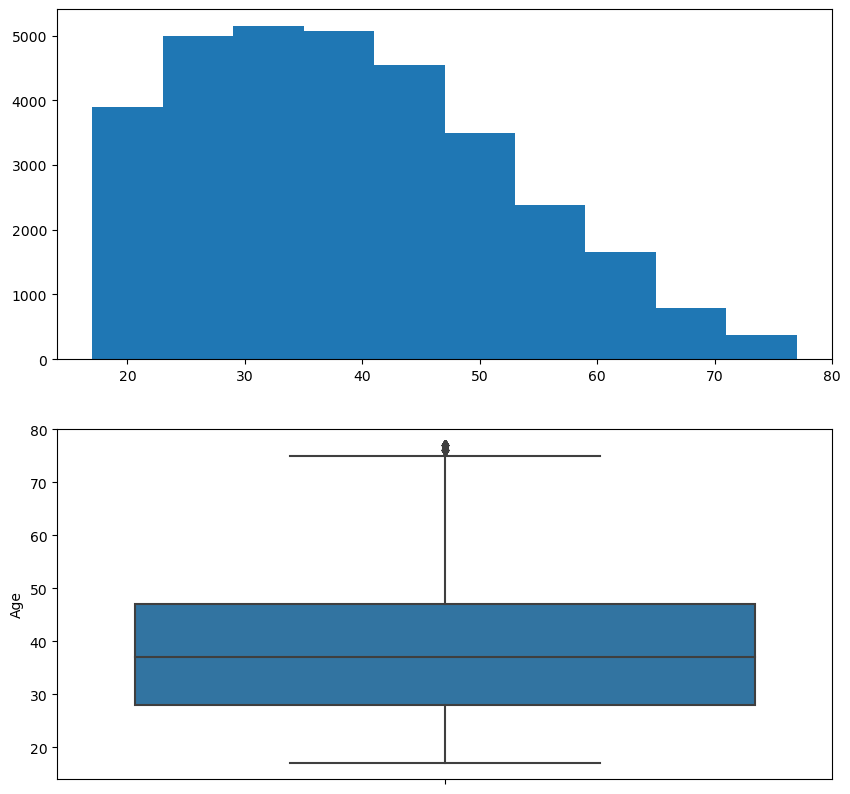

In [21]:
num_visual('Age')

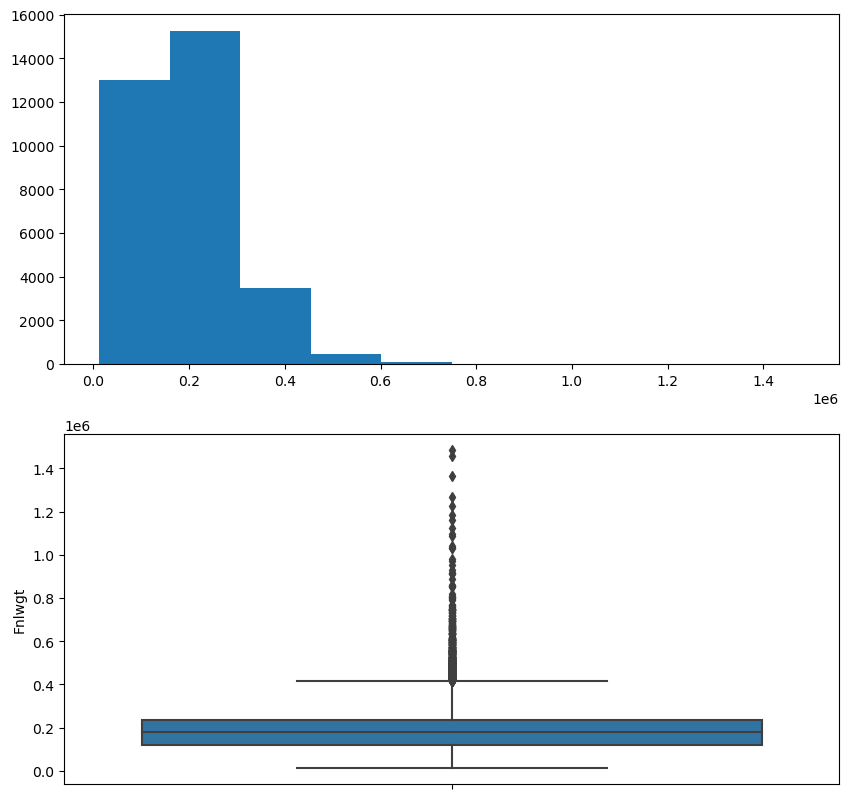

In [22]:
num_visual('Fnlwgt')

In [23]:
iqr=incomdf['Fnlwgt'].quantile(0.75)-incomdf['Fnlwgt'].quantile(0.25)
lf=incomdf['Fnlwgt'].quantile(0.25)-1.5*iqr
uf=incomdf['Fnlwgt'].quantile(0.75)+1.5*iqr
incomdf=incomdf[(incomdf['Fnlwgt']>lf) & (incomdf['Fnlwgt']<uf)] 

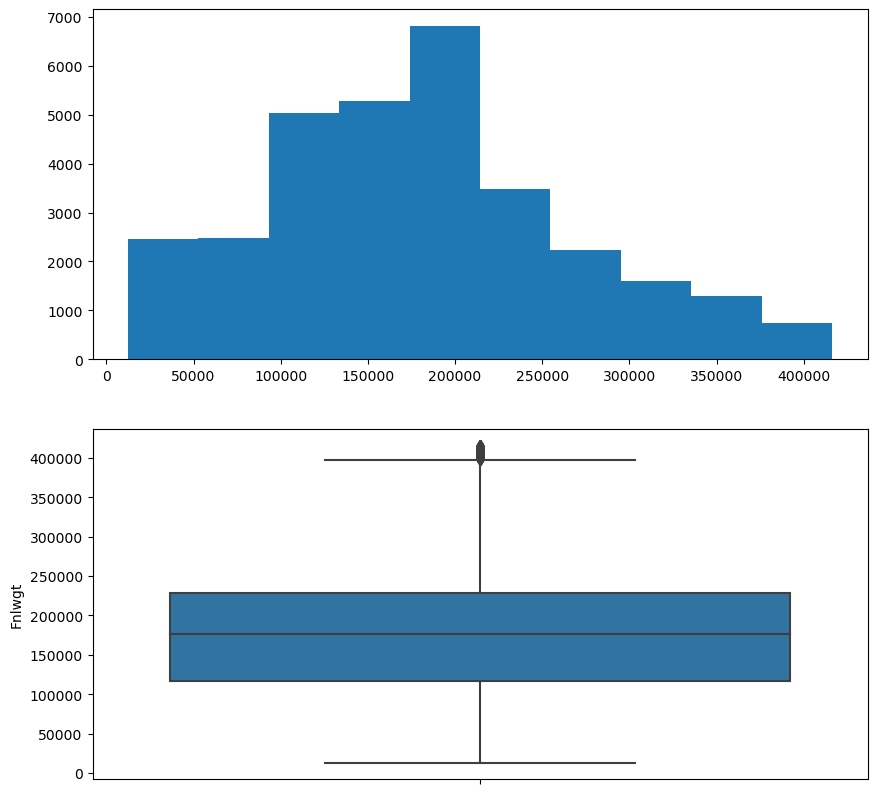

In [24]:
num_visual('Fnlwgt')

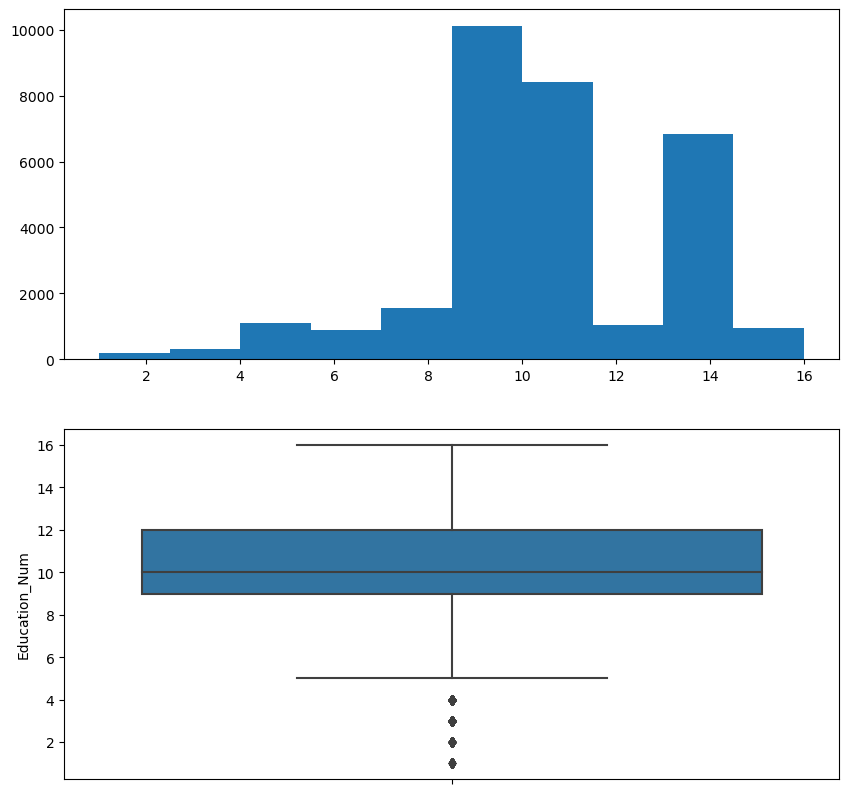

In [25]:
num_visual('Education_Num')

In [26]:
incomdf=incomdf[incomdf['Education_Num']!=5.0]

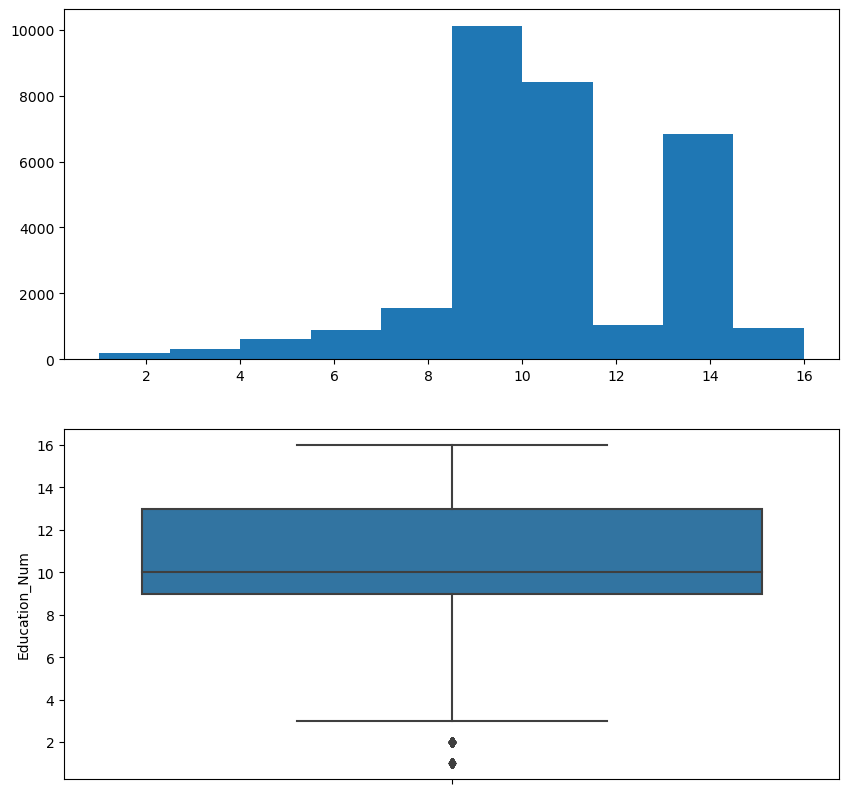

In [27]:
num_visual('Education_Num')

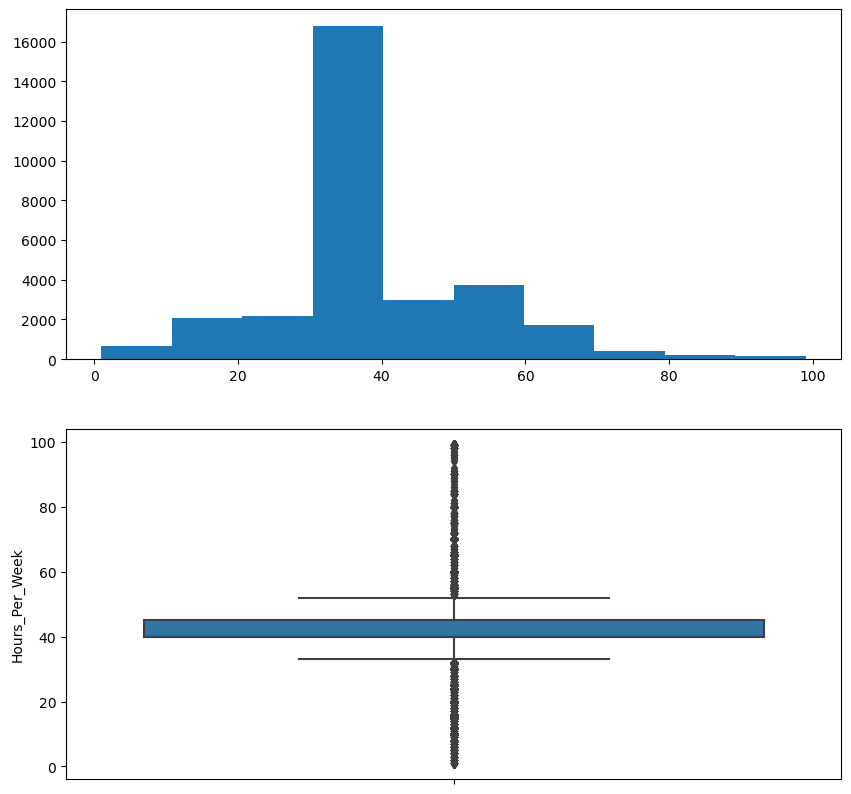

In [28]:
num_visual('Hours_Per_Week')

In [29]:
iqr=incomdf['Hours_Per_Week'].quantile(0.75)-incomdf['Hours_Per_Week'].quantile(0.25)
lf=incomdf['Hours_Per_Week'].quantile(0.25)-1.5*iqr
uf=incomdf['Hours_Per_Week'].quantile(0.75)+1.5*iqr
incomdf=incomdf[(incomdf['Hours_Per_Week']>lf) & (incomdf['Hours_Per_Week']<uf)] 

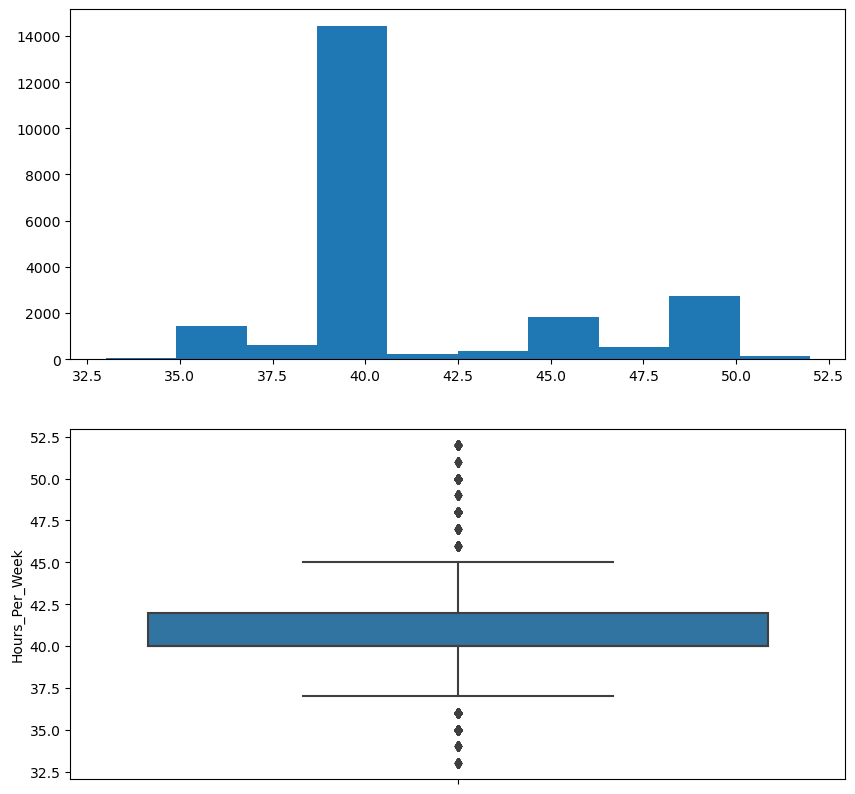

In [30]:
num_visual('Hours_Per_Week')

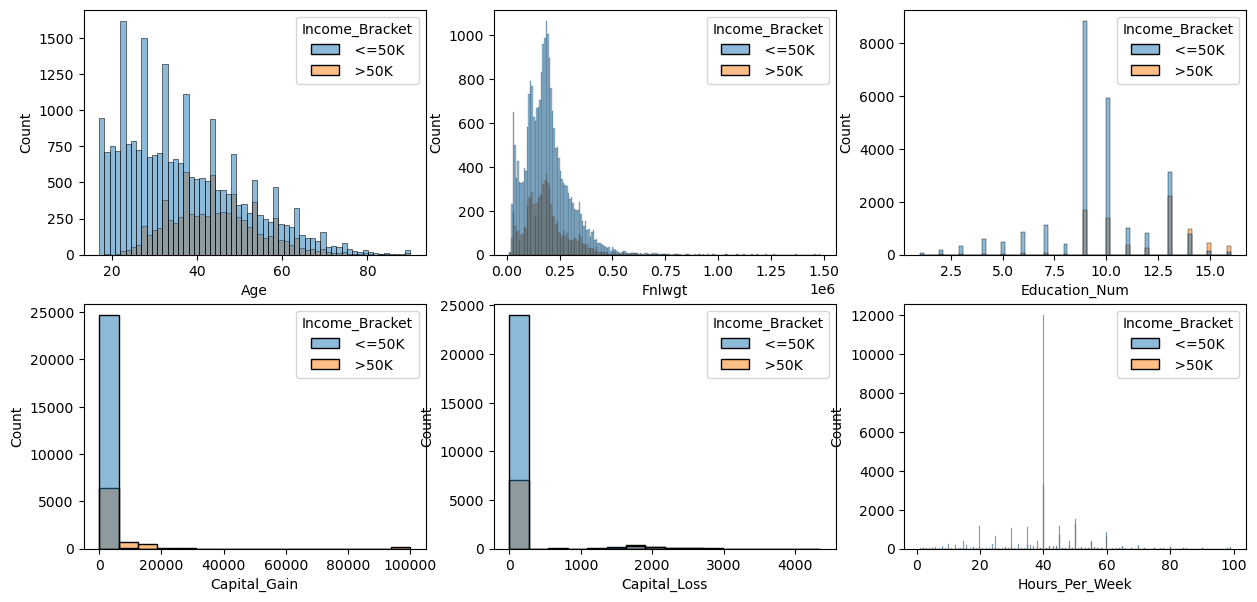

In [31]:
num_col = incom_df.select_dtypes(["int64"])

fig,axs=plt.subplots(2,3,figsize=(15,7))
axs=axs.ravel()

count=0
for i in num_col:
    sns.histplot(x=i,hue='Income_Bracket',data=incom_df,ax=axs[count])
    count+=1

In [32]:
# people with age between 20-40 years have income less than equal to 50k
# people with education number between 8-10 are more and have income less than or equal 50k
# people with no capital gain have income less than or equal 50k
# people with capital gain of upto 20000 and 100000 have income greater than 50k
# maximum people with no capital loss have income less than equal to 50k.
# people with capital gain upto 2000 have income greater than 50k.
# maximum people with 40 hours per week have income less than or equal to 50k.

<AxesSubplot:xlabel='Income_Bracket', ylabel='Age'>

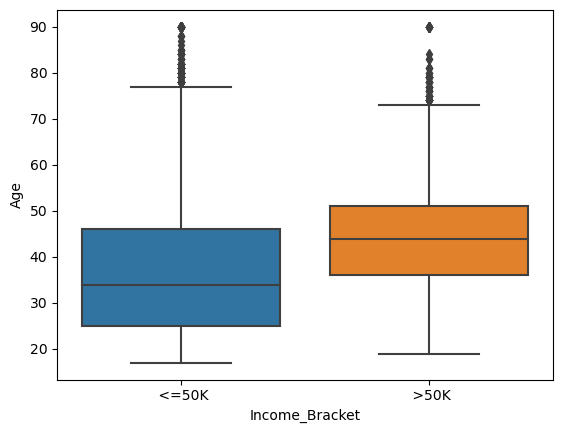

In [33]:
sns.boxplot(y='Age',x='Income_Bracket',data=incom_df)

The graph with the help of boxplot shows the age and the income , people with avg. age of 45 earn above 50k.

<AxesSubplot:xlabel='count', ylabel='WorkClass'>

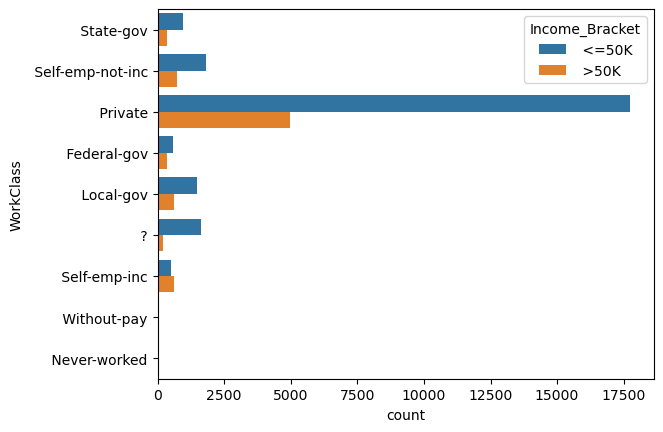

In [34]:
sns.countplot(y='WorkClass',hue='Income_Bracket',data=incom_df)

Most of the people of the Private WorkClass have income less than 50k.

<AxesSubplot:xlabel='Income_Bracket', ylabel='Education_Num'>

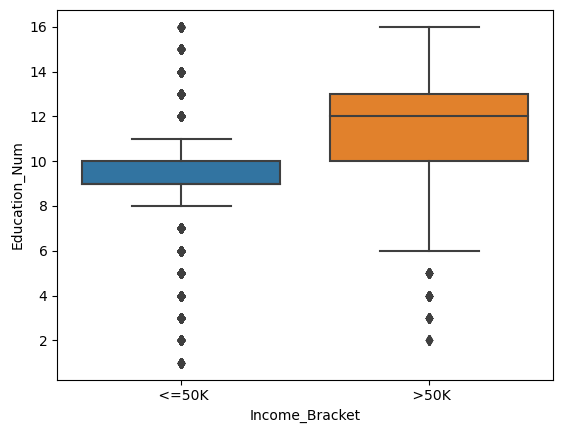

In [35]:
sns.boxplot(y='Education_Num',x='Income_Bracket',data=incom_df)

The graph tells that the people who have an Education_Num of 10 and above earn more than 50k.

<AxesSubplot:xlabel='count', ylabel='Education'>

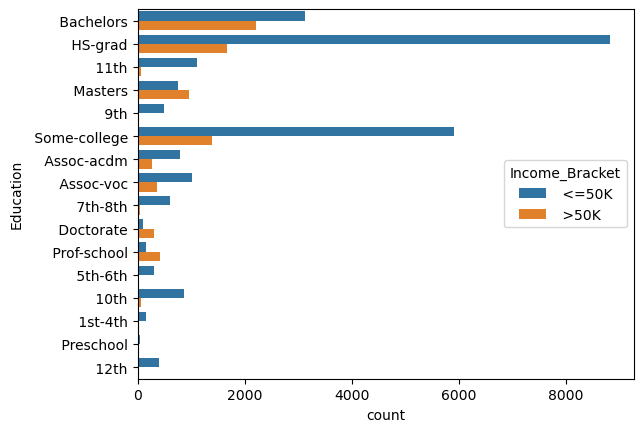

In [36]:
sns.countplot(y='Education',hue='Income_Bracket',data=incom_df)

The people who are High School graduates earn less than 50k.

<AxesSubplot:xlabel='count', ylabel='Marital_Status'>

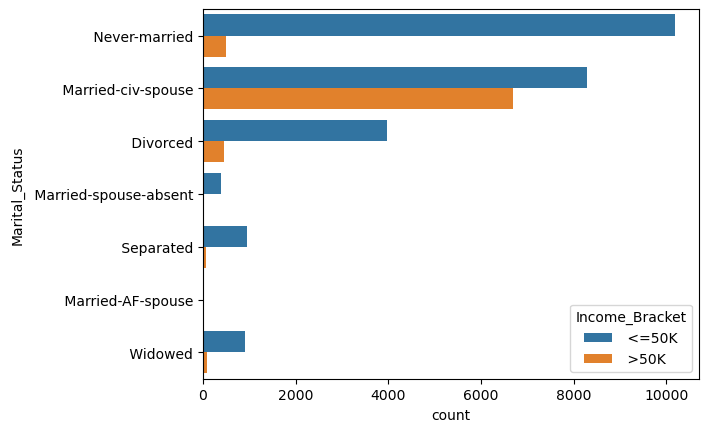

In [37]:
sns.countplot(y='Marital_Status',hue='Income_Bracket',data=incom_df)

Most of the people who are not married have income less than 50k.

<AxesSubplot:xlabel='count', ylabel='Race'>

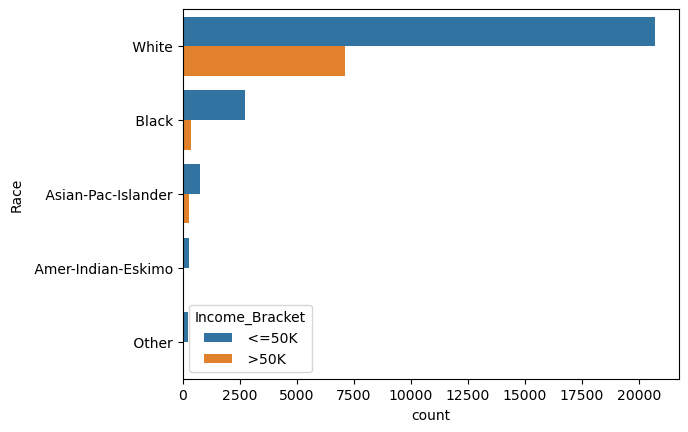

In [38]:
sns.countplot(y='Race',hue='Income_Bracket',data=incom_df)

Most of the white people are the ones who have a income more than 50k.

<AxesSubplot:xlabel='Gender', ylabel='count'>

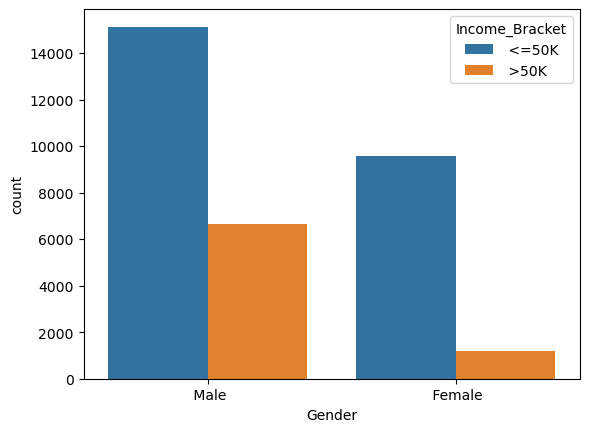

In [39]:
sns.countplot(x='Gender',hue='Income_Bracket',data=incom_df)

Most of the Males earn more than 50k.

<AxesSubplot:xlabel='count', ylabel='Occupation'>

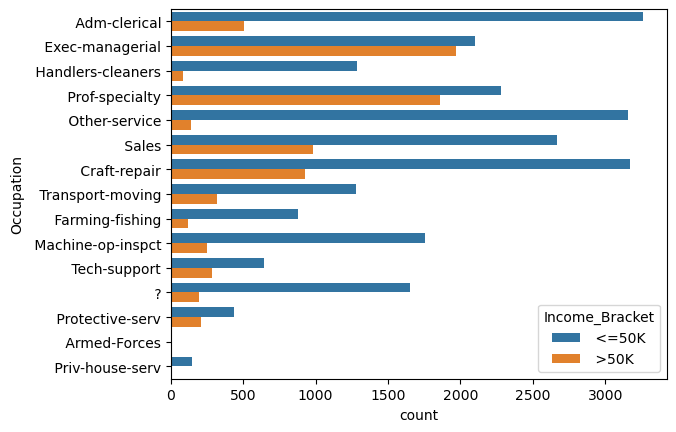

In [40]:
sns.countplot(y='Occupation',hue='Income_Bracket',data=incom_df)

People who have an occupation of Adm-Clerical , Exec-managerial, other services and craft repair have the highest count who earn less than 50k.

<AxesSubplot:xlabel='Income_Bracket', ylabel='Hours_Per_Week'>

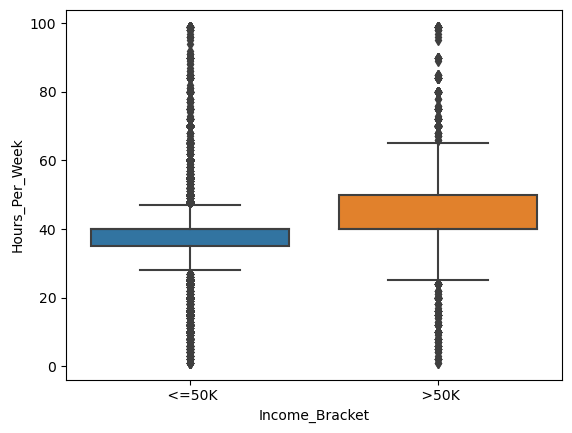

In [41]:
sns.boxplot(y='Hours_Per_Week',x='Income_Bracket',data=incom_df)

Shows people who work more than 40 hours per week have an income more than 50k.

In [42]:
# converting non numeric labeled columns into category types

In [43]:
incomdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22363 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             22363 non-null  int64 
 1   WorkClass       22363 non-null  object
 2   Fnlwgt          22363 non-null  int64 
 3   Education       22363 non-null  object
 4   Education_Num   22363 non-null  int64 
 5   Marital_Status  22363 non-null  object
 6   Occupation      22363 non-null  object
 7   Relationship    22363 non-null  object
 8   Race            22363 non-null  object
 9   Gender          22363 non-null  object
 10  Capital_Gain    22363 non-null  int64 
 11  Capital_Loss    22363 non-null  int64 
 12  Hours_Per_Week  22363 non-null  int64 
 13  Native_Country  22363 non-null  object
 14  Income_Bracket  22363 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.7+ MB


In [44]:
categorical_columns = ['WorkClass', 'Education', 'Marital_Status', 'Occupation', 'Relationship','Race', 'Gender', 'Native_Country', 'Income_Bracket']
incomdf[categorical_columns] = incomdf[categorical_columns].astype('category')

In [45]:
incomdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22363 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             22363 non-null  int64   
 1   WorkClass       22363 non-null  category
 2   Fnlwgt          22363 non-null  int64   
 3   Education       22363 non-null  category
 4   Education_Num   22363 non-null  int64   
 5   Marital_Status  22363 non-null  category
 6   Occupation      22363 non-null  category
 7   Relationship    22363 non-null  category
 8   Race            22363 non-null  category
 9   Gender          22363 non-null  category
 10  Capital_Gain    22363 non-null  int64   
 11  Capital_Loss    22363 non-null  int64   
 12  Hours_Per_Week  22363 non-null  int64   
 13  Native_Country  22363 non-null  category
 14  Income_Bracket  22363 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.4 MB


In [46]:
# using label encoder


label_encoder =preprocessing.LabelEncoder()

for col in categorical_columns:
    incomdf[col] = label_encoder.fit_transform(incomdf[col])

In [47]:
incomdf

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,7,77516,8,13,4,1,1,4,1,2174,0,40,39,0
2,38,4,215646,10,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,8,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,11,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,4,310152,14,10,4,11,1,4,1,0,0,40,39,0
32556,27,4,257302,6,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,10,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,10,9,6,1,4,4,0,0,0,40,39,0


In [48]:
# all the categorical columns have been label encoded

In [49]:
# correlation

In [50]:
corr_mat = incomdf.corr()

In [51]:
corr_mat

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
Age,1.000000,0.018151,-0.066296,-0.027365,0.022799,-0.278542,0.003079,-0.218695,0.022329,0.071722,0.084282,0.058310,0.050520,-0.000091,0.254016
WorkClass,0.018151,1.000000,-0.019181,0.007556,0.038027,-0.046724,0.187805,-0.078589,0.053939,0.079778,0.030565,0.002877,0.083272,-0.001247,0.030338
Fnlwgt,-0.066296,-0.019181,1.000000,-0.020480,-0.038733,0.031693,0.002611,0.000596,-0.003063,0.022376,-0.004195,-0.002925,-0.013003,-0.051908,-0.002003
Education,-0.027365,0.007556,-0.020480,1.000000,0.266796,-0.020615,-0.029952,0.014500,0.013839,-0.033425,0.022850,0.011052,0.030242,0.068238,0.053715
Education_Num,0.022799,0.038027,-0.038733,0.266796,1.000000,-0.028425,0.128212,-0.068500,0.027882,-0.006347,0.107044,0.072366,0.146424,0.051515,0.323146
Marital_Status,-0.278542,-0.046724,0.031693,-0.020615,-0.028425,1.000000,-0.002780,0.147198,-0.075483,-0.090145,-0.033655,-0.027750,-0.088703,-0.028352,-0.171419
Occupation,0.003079,0.187805,0.002611,-0.029952,0.128212,-0.002780,1.000000,-0.091185,0.007680,0.094974,0.020492,0.018730,0.079095,-0.013745,0.081481
Relationship,-0.218695,-0.078589,0.000596,0.014500,-0.068500,0.147198,-0.091185,1.000000,-0.125571,-0.591453,-0.047394,-0.061929,-0.181460,-0.004635,-0.240145
Race,0.022329,0.053939,-0.003063,0.013839,0.027882,-0.075483,0.007680,-0.125571,1.000000,0.103538,0.010453,0.019771,0.091908,0.153423,0.075113
Gender,0.071722,0.079778,0.022376,-0.033425,-0.006347,-0.090145,0.094974,-0.591453,0.103538,1.000000,0.039819,0.048484,0.182686,-0.005055,0.212532


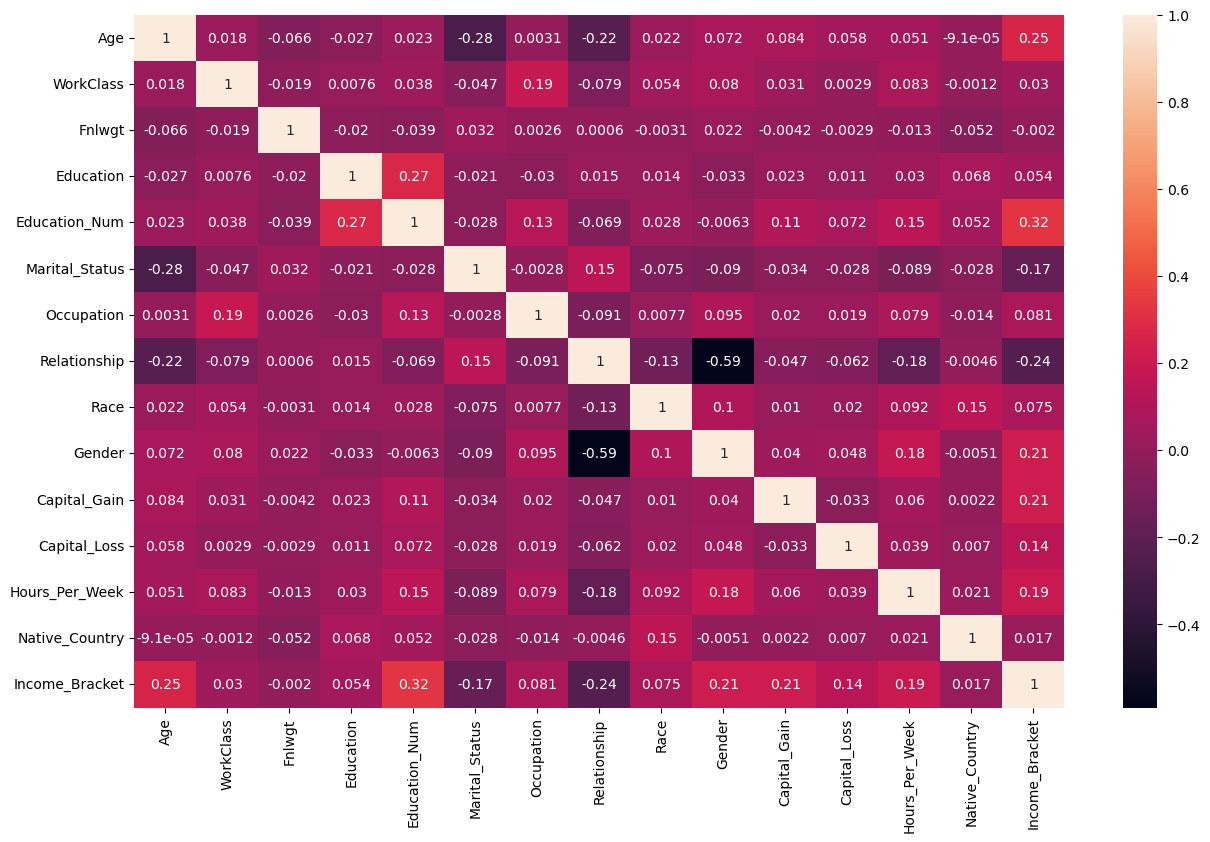

In [52]:
plt.figure(figsize=(15,9))

sns.heatmap(corr_mat,annot=True)
plt.show()

In [53]:
# with Income 
# Age, Education number , Capital Gain , Gender seems to be correlerated

In [54]:
incomdf.drop('Native_Country',axis=1,inplace=True)

In [55]:
incomdf.drop('Race',axis=1,inplace=True)

In [56]:
incomdf.drop('Fnlwgt',axis=1,inplace=True)

In [57]:
# no correlation with any other features

In [58]:
# spltting and scaling

In [59]:
y=incomdf['Income_Bracket']
X=incomdf.drop('Income_Bracket',axis=1)

scaled_X = MinMaxScaler().fit_transform(X)
scaled_X

array([[0.36666667, 0.875     , 0.57142857, ..., 0.02174022, 0.        ,
        0.36842105],
       [0.35      , 0.5       , 0.71428571, ..., 0.        , 0.        ,
        0.36842105],
       [0.6       , 0.5       , 0.07142857, ..., 0.        , 0.        ,
        0.36842105],
       ...,
       [0.38333333, 0.5       , 0.71428571, ..., 0.        , 0.        ,
        0.36842105],
       [0.68333333, 0.5       , 0.71428571, ..., 0.        , 0.        ,
        0.36842105],
       [0.58333333, 0.625     , 0.71428571, ..., 0.1502415 , 0.        ,
        0.36842105]])

In [60]:
X_train, X_test,y_train, y_test=train_test_split(scaled_X,y,test_size=0.2,random_state=42)

In [61]:
# the training data and the test data have been split into 80 and 20 ratio

# Task 3

In [62]:
model=LogisticRegression().fit(X_train,y_train)

In [63]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [64]:
# predicted values on the test data

# Task 4

In [65]:
#roc curve(log)
#auc curve(r_prob)
log_prob=model.predict_proba(X_test)
log_prob=log_prob[:,1]
r_prob=[0 for _ in range(len(y_test))]

In [66]:
print("score: ", model.score(X_train,y_train))

score:  0.8105645612073784


In [67]:
# score of train data

In [68]:
print("score: ", model.score(X_test,y_test))

score:  0.8198077353006931


In [69]:
# score of test data

In [70]:
#model evaluation for classification
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

print(tn,fp,fn,tp)

3154 201 605 513


In [71]:
# 201 and 605 are the errors

In [72]:
print(precision_score(y_test,y_pred))

0.7184873949579832


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3355
           1       0.72      0.46      0.56      1118

    accuracy                           0.82      4473
   macro avg       0.78      0.70      0.72      4473
weighted avg       0.81      0.82      0.81      4473



In [74]:
# the classification report with accuracy and precision 
# with prediction of income less than or equal 50k is higher as compared with the income greater than 50k

In [75]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8198077353006931


In [76]:
# with 81% accuracy on the test data

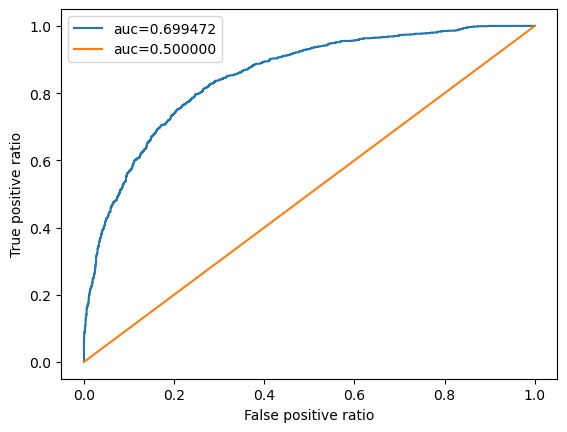

In [77]:
fpr,tpr,threshold=roc_curve(y_test,log_prob)
auc=roc_auc_score(y_test,y_pred)
r_fpr,r_tpr,threshold=roc_curve(y_test,r_prob)
r_auc=roc_auc_score(y_test,r_prob)
plt.plot(fpr,tpr,label="auc={:2f}".format(auc))
plt.plot(r_fpr,r_tpr,label="auc={:2f}".format(r_auc))
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.legend()
plt.show()

In [78]:
# model fits best with roc and auc curve, good quality

**Age, Education number , Capital Gain , Gender** are the features that effect on income 